# Significance

In [2]:
import pandas as pd
import seaborn as sbn
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path().resolve().parents[1]
results_dir = project_root / "output" / "statistics/"


With Bonferroni correction:
For low_Q: median pvalue: 5.3611554159228485e-06
For low_Q: Number of statistically significant features: 67
For high_Q: median pvalue: 2.456834304445716e-06
For high_Q: Number of statistically significant features: 265
For random_Q: median pvalue: 4.443875320573651e-06
For random_Q: Number of statistically significant features: 96.2
With Bonferroni correction:
For low_Q: median pvalue: 2.3571304929856972e-06
For low_Q: Number of statistically significant features: 332
For high_Q: median pvalue: 4.893289211019218e-07
For high_Q: Number of statistically significant features: 651
For random_Q: median pvalue: 1.0101052405302088e-06
For random_Q: Number of statistically significant features: 503.15


/tmp/ipykernel_11907/4208216702.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sampling_Q"].replace(


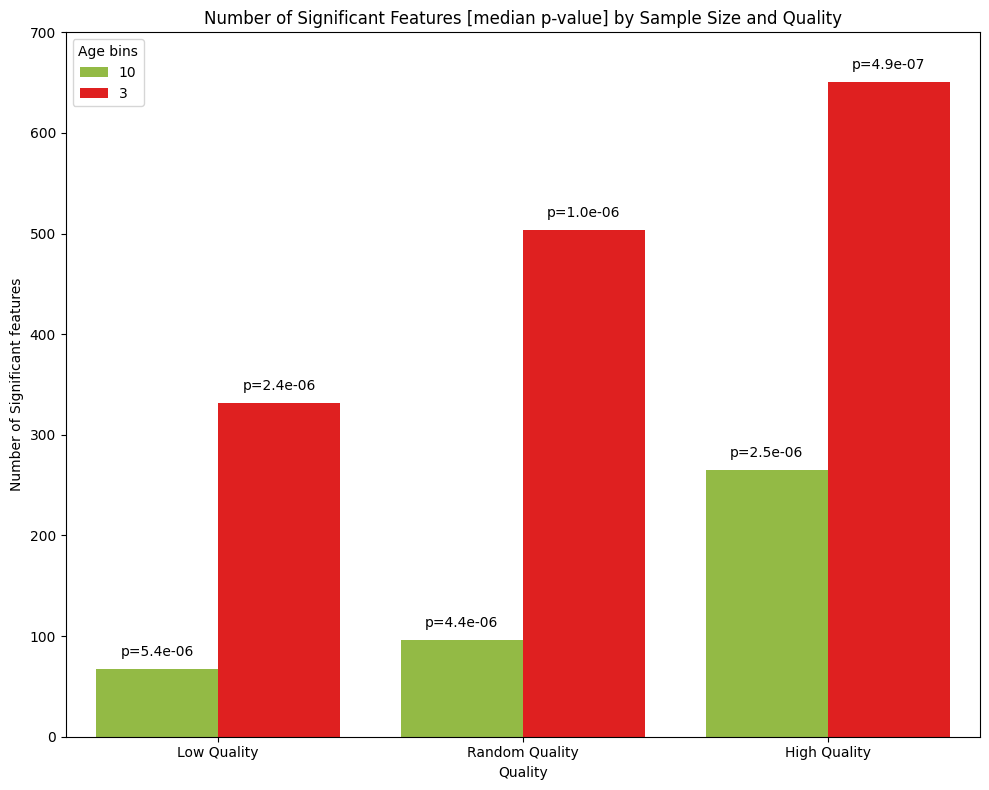

In [3]:
results = pd.DataFrame()
sampling_list = ["low_Q", "high_Q"]
age_bins = 10
random_q_repetitions = 20

p_value_threshold = 0.05 / 3747
print("With Bonferroni correction:")
data_10 = []

stats_all = []

for sampling in sampling_list:
    results_sampling = pd.read_csv(
        results_dir
        / (
            "statistic_test_"
            + str(age_bins)
            + "_bins_sampling_"
            + sampling
            + "_5_sites.csv"
        ),
        index_col=0,
    )

    significant_features = results_sampling[
        results_sampling["P-value"] < p_value_threshold
    ]

    print(
        "For "
        + sampling
        + ": median pvalue: "
        + str(significant_features["P-value"].median())
    )
    print(
        "For "
        + sampling
        + ": Number of statistically significant features: "
        + str(significant_features.__len__())
    )

    data_10.append(
        {
            "Sampling_Q": sampling,
            "Median p-value": significant_features["P-value"].median(),  # noqa
            "Number of Significant features": significant_features.__len__(),
        }
    )

# %%
# # for the random distributions
sampling = "random_Q"
results_sampling = pd.read_csv(
    results_dir
    / (
        "statistic_test_"
        + str(age_bins)
        + "bins_"
        + str(random_q_repetitions)
        + "repeated_random_sampling_5_sites.csv"
    ),
    index_col=0,
)  # noqa

significant_features = results_sampling[results_sampling["P-value"] < p_value_threshold]  # noqa

print(
    "For "
    + sampling
    + ": median pvalue: "
    + str(significant_features["P-value"].median())
)  # noqa
print(
    "For "
    + sampling
    + ": Number of statistically significant features: "
    + str(significant_features.__len__() / random_q_repetitions)
)  # noqa

data_10.append(
    {
        "Sampling_Q": sampling,
        "Median p-value": significant_features["P-value"].median(),
        "Number of Significant features": significant_features.__len__()
        / random_q_repetitions,
    }
)  # noqa
data_10 = pd.DataFrame(data_10)

data_10["Age bins"] = 10

# %%
age_bins = 3
random_q_repetitions = 20

p_value_threshold = 0.05 / 3747
print("With Bonferroni correction:")
data_3 = []
for sampling in sampling_list:
    results_sampling = pd.read_csv(
        results_dir
        / (
            "statistic_test_"
            + str(age_bins)
            + "_bins_sampling_"
            + sampling
            + "_5_sites.csv"
        ),
        index_col=0,
    )  # noqa

    significant_features = results_sampling[
        results_sampling["P-value"] < p_value_threshold
    ]  # noqa

    print(
        "For "
        + sampling
        + ": median pvalue: "
        + str(significant_features["P-value"].median())
    )  # noqa
    print(
        "For "
        + sampling
        + ": Number of statistically significant features: "
        + str(significant_features.__len__())
    )  # noqa
    data_3.append(
        {
            "Sampling_Q": sampling,
            "Median p-value": significant_features["P-value"].median(),  # noqa
            "Number of Significant features": significant_features.__len__(),
        }
    )  # noqa
# %%
# # for the random distributions
sampling = "random_Q"
results_sampling = pd.read_csv(
    results_dir
    / (
        "statistic_test_"
        + str(age_bins)
        + "bins_"
        + str(random_q_repetitions)
        + "repeated_random_sampling_5_sites.csv"
    ),
    index_col=0,
)  # noqa

significant_features = results_sampling[results_sampling["P-value"] < p_value_threshold]  # noqa

print(
    "For "
    + sampling
    + ": median pvalue: "
    + str(significant_features["P-value"].median())
)  # noqa
print(
    "For "
    + sampling
    + ": Number of statistically significant features: "
    + str(significant_features.__len__() / random_q_repetitions)
)  # noqa

data_3.append(
    {
        "Sampling_Q": sampling,
        "Median p-value": significant_features["P-value"].median(),  # noqa
        "Number of Significant features": significant_features.__len__()
        / random_q_repetitions,
    }
)  # noqa
data_3 = pd.DataFrame(data_3)

data_3["Age bins"] = 3
# %%

data = pd.concat([data_3, data_10])
# %%

# %%


df = data
df["Sampling_Q"].replace(
    {
        "low_Q": "Low Quality",
        "high_Q": "High Quality",
        "random_Q": "Random Quality",
    },
    inplace=True,
)
# Define the desired order and hue_order
order = ["Low Quality", "Random Quality", "High Quality"]
hue_order = [10, 3]

# Initialize the plot
plt.figure(figsize=(10, 8))
ax = sbn.barplot(
    data=df,
    x="Sampling_Q",
    y="Number of Significant features",
    hue="Age bins",
    order=order,  # Enforce category order
    hue_order=hue_order,  # Enforce hue order
    palette=["yellowgreen", "red"],  # 10: green, 3: red
)

# Annotate p-values
for i, (cat, hue) in enumerate(zip(df["Sampling_Q"], df["Age bins"])):
    # Find the correct index in order/hue_order
    x_index = order.index(cat)  # x position
    hue_index = hue_order.index(hue)  # hue position

    # Calculate bar position
    bar_width = 0.8 / len(hue_order)  # Width split between hues
    x_pos = (
        x_index - 0.4 + (hue_index + 0.5) * bar_width
    )  # Adjust x-pos for hue   # noqa
    # Annotate above the correct bar
    height = df["Number of Significant features"].iloc[i]
    p_value = df["Median p-value"].iloc[i]
    ax.text(
        x_pos,
        height + 10,
        f"p={p_value:.1e}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Customize the plot
plt.title(
    "Number of Significant Features [median p-value] by Sample Size and Quality",
    fontsize=12,
)  # noqa
plt.xlabel("Quality", fontsize=10)
plt.ylabel("Number of Significant features", fontsize=10)
plt.legend(title="Age bins")
plt.ylim([0, 700])

# Show the plot
plt.tight_layout()
plt.show()


# %%


In [2]:
site_list = ("SALD", "eNKI", "CamCAN", "AOMIC_ID1000", "1000Brains")
sampling_list = ("low_Q", "high_Q")
age_bins = 10

p_value_threshold = 0.05 / 3747

pooled_data_dir = results_dir / "pooled_data" / ("N_bins_" + str(age_bins) + "/")

In [13]:
a = pooled_data_random[pooled_data_random["P-value"] < p_value_threshold].shape[0]  # noqa
a

2157

<Axes: xlabel='QC_sampling', ylabel='N_significant'>

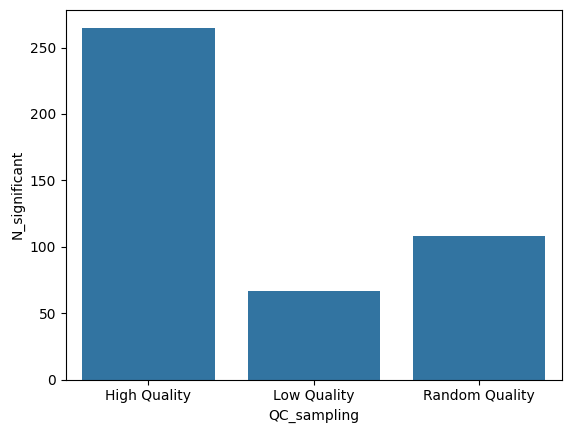

# Single site

In [1]:
import pandas as pd
import seaborn as sbn
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path().resolve().parents[1]
results_dir = project_root / "output" / "statistics/"


In [ ]:
site_list = ("SALD", "eNKI", "CamCAN", "AOMIC_ID1000", "1000Brains")
sampling_list = ("low_Q", "high_Q")
age_bins = 3

p_value_threshold = 0.05 / 3747

single_site_dir = results_dir / "single_site" / ("N_bins_" + str(age_bins) + "/")

In [ ]:
results = pd.DataFrame()
for sampling in sampling_list:
    for site in site_list:
        site_data = pd.read_csv(
            single_site_dir
            / (
                "statistic_test_"
                + str(age_bins)
                + "_bins_sampling_"
                + str(sampling)
                + "_"
                + str(site)
                + ".csv"
            ),
            index_col=0,
        )
        site_data["Site"] = site
        site_data["N_bins"] = age_bins
        site_data["Number of Significant features"] = site_data[
            site_data["P-value"] < p_value_threshold
        ].__len__()
        results = pd.concat([results, site_data])


# significant_features = results_sampling[results_sampling["P-value"] < p_value_threshold]  # noqa

# print(
#     "For "
#     + sampling
#     + ": median pvalue: "
#     + str(significant_features["P-value"].median())
# )  # noqa
# print(
#     "For "
#     + sampling
#     + ": Number of statistically significant features: "
#     + str(significant_features.__len__() / random_q_repetitions)
# )  # noqa

# data_3.append(
#     {
#         "Sampling_Q": sampling,
#         "Median p-value": significant_features["P-value"].median(),  # noqa
#         "Number of Significant features": significant_features.__len__()
#         / random_q_repetitions,
#     }
# )

In [ ]:
results

<Axes: xlabel='Site', ylabel='Number of Significant features'>

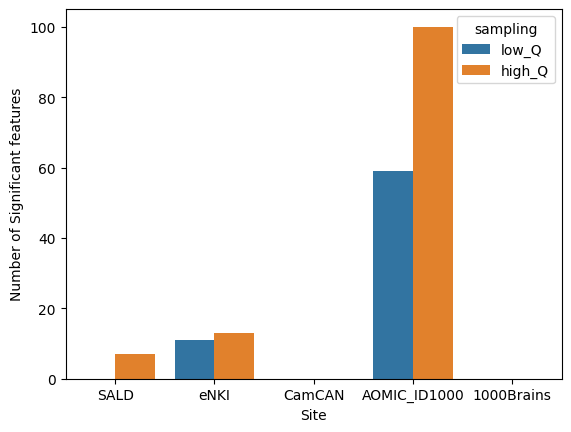

In [36]:
sbn.barplot(data=results, x="Site", y="Number of Significant features", hue="sampling")

# Welch (don't assume equal variance)

In [ ]:
pooled_data_random = pd.read_csv(
    pooled_data_dir / "welch_statistic_test_10bins_20repeated_random_sampling.csv",
    index_col=0,
)
pooled_data_random["QC_sampling"] = "Random Quality"
pooled_data_random["N_significant"] = (pooled_data_random[
    pooled_data_random["P-value"] < p_value_threshold
].shape[0])/20  # noqa

pooled_data_high = pd.read_csv(
    pooled_data_dir / "welch_test_10_bins_sampling_high_Q.csv",
    index_col=0,
)
pooled_data_high["QC_sampling"] = "High Quality"
pooled_data_high["N_significant"] = pooled_data_high[
    pooled_data_high["P-value"] < p_value_threshold
].shape[0]  # noqa

pooled_data_low = pd.read_csv(
    pooled_data_dir / "welch_test_10_bins_sampling_low_Q.csv",
    index_col=0,
)
pooled_data_low["QC_sampling"] = "Low Quality"
pooled_data_low["N_significant"] = pooled_data_low[
    pooled_data_low["P-value"] < p_value_threshold
].shape[0]  # noqa

data = pd.concat([pooled_data_high, pooled_data_low, pooled_data_random])

sbn.barplot(data=data, x="QC_sampling", y="N_significant")
